# Monte Carlo: 2D Ising Model-3

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# initialize system parameters
J = 1.0
kB = 1.0
Tc = 2/np.log(1+np.sqrt(2))

# Hamiltonian
def energy(s, L):
    E = 0
    for i in range(L):
        for j in range(L):
            E += s[i,j] * (s[(i+1)%L, j] + s[i, (j+1)%L])
    energy = -J * E
    return energy

# magnetization
def magnet(s, L):
    M = 0.0
    for i in range(L):
        for j in range(L):
            M += s[i,j]
    return M

def random_spins(L):
    s = np.zeros([L,L], int)
    for i in range(L):
        for j in range(L):
            s[i,j] = 2 * int( 2 * np.random.random() ) -1
    return s

def dE(s, L, i, j):
    NB = s[(i+1)%L,j]+s[i,(j+1)%L]+s[(i-1)%L,j]+s[i,(j-1)%L]
    dE = 2 * s[i,j]*NB
    return dE

def printSPINS(s, L):
    for i in range(L):
        row = ''
        for j in range(L):
            if s[i,j] == +1: row += '＋'
            if s[i,j] == -1: row += '－'
        print(row)
    print()

In [3]:
def Monte_Carlo(T, L, N_MC, spins):
    # initialize measurements
    beta = 1.0/(kB*T)
    
    accept = 0
    E = np.empty(N_MC)
    M = np.empty(N_MC)

    # main MC loop
    for n in range(N_MC):
        # random update
        for update in range(L*L):
            i = np.random.randint(L)
            j = np.random.randint(L)
            if np.random.random() < np.exp(- beta * dE(spins, L, i, j)):
                spins[i,j] = -spins[i,j]
                accept += 1
        # measurements
        E[n] = energy(spins, L)
        M[n] = magnet(spins, L)
    
    acceptRatio = accept/(N_MC*(L*L)) #  per spin

    return acceptRatio, spins, E, M

In [4]:
def MC_average(T, E, M):
    N_MC = len(E)
    
    E_sqr = E * E
    E_mean = E.mean()
    E_sqr_mean = E_sqr.mean()
    C = (E_sqr_mean-E_mean*E_mean)/(kB*T*T)
        
    M_abs = np.absolute(M)    
    M_sqr = M * M
    M_mean = M.mean()
    M_abs_mean = M_abs.mean()
    M_sqr_mean = M_sqr.mean()
    Chi = (M_sqr_mean-M_mean*M_mean)/(kB*T)
    Chi_abs = (M_sqr_mean-M_abs_mean*M_abs_mean)/(kB*T)    

    return E_mean, C, M_abs_mean, Chi_abs, M_mean, Chi, M_sqr_mean

## $8 \times 8$ lattice

In [5]:
N_equilib = 100
N_MC = 1000
L = 8
N = L * L

Ti = 0.5
Tf = 5
dt = 0.25

spins = np.ones( [L, L], int)
print('{:<16} {:<16} {:<16} {:<16} {:<16} {:<16} {:<16} {:<16}'.format(
    'T', '<E>/N=<e>', 'C', '<|M|>/N=<|m|>', 'chi_|m|/N', 'acceptRatio', '<M>/N=<m>', 'chi/N')  )

for T in np.arange(Ti, Tf+dt, dt):
    _, spins, _, _ = Monte_Carlo(T,L,N_equilib,spins)
    acceptRatio, spins, E_list, M_list = Monte_Carlo(T,L,N_MC,spins)
    E_mean, C_mean, M_abs_mean, chi_abs_mean, M_mean, chi_mean, M_sqr_mean = MC_average(T, E_list, M_list)    
     
    print('{:<16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f} {:<+16f}'.format(
        T, E_mean/N, C_mean, M_abs_mean/N, chi_abs_mean/N, acceptRatio, M_mean/N, chi_mean/N))    

T                <E>/N=<e>        C                <|M|>/N=<|m|>    chi_|m|/N        acceptRatio      <M>/N=<m>        chi/N           
0.500000         -2.000000        +0.000000        +1.000000        +0.000000        +0.000000        +1.000000        +0.000000       
0.750000         -2.000000        +0.000000        +1.000000        +0.000000        +0.000000        +1.000000        +0.000000       
1.000000         -1.996375        +1.898176        +0.999062        +0.002069        +0.001031        +0.999062        +0.002069       
1.250000         -1.982813        +6.301440        +0.995375        +0.010005        +0.004750        +0.995375        +0.010005       
1.500000         -1.948500        +13.859726       +0.986094        +0.027957        +0.013766        +0.986094        +0.027957       
1.750000         -1.889312        +22.405533       +0.966688        +0.073344        +0.031547        +0.966688        +0.073344       
2.000000         -1.749313        +42.275516    

In [6]:
N_equilib = 100
N_MC = 1000
L = 8
N = L * L

T_all = np.linspace(0.5, 5, 20)
E_all = np.empty_like(T_all)
C_all = np.empty_like(T_all)
M_abs_all = np.empty_like(T_all)
chi_abs_all = np.empty_like(T_all)
M_all = np.empty_like(T_all)
chi_all = np.empty_like(T_all)
M_sqr_all = np.empty_like(T_all)
    
spins = np.ones( [L, L], int)
for i, T in enumerate(T_all):
    _, spins, _, _ = Monte_Carlo(T,L,N_equilib,spins)
    acceptRatio, spins, E_list, M_list = Monte_Carlo(T,L,N_MC,spins)
    E_all[i], C_all[i], M_abs_all[i], chi_abs_all[i], M_all[i], chi_all[i], M_sqr_all[i] = MC_average(T, E_list, M_list)    

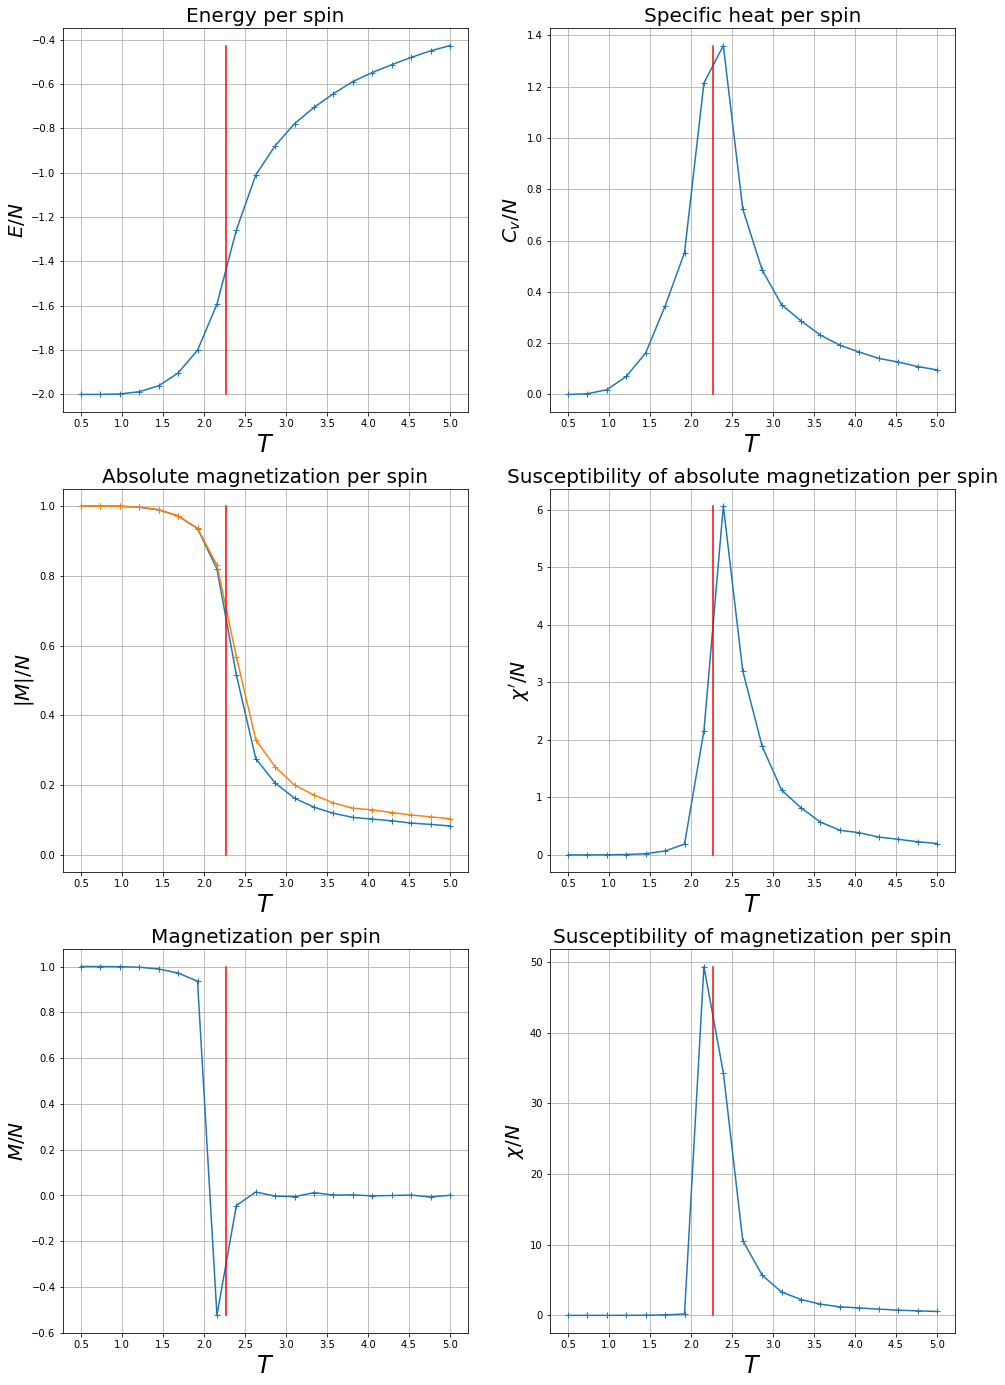

In [10]:
fig, axes = plt.subplots(3, 2, figsize=(16,24))
T_ticks = np.linspace(0.5, 5, 10)

axes[0,0].set_title("Energy per spin", fontsize=20)
axes[0,0].plot(T_all, E_all/N, '-+')
axes[0,0].plot([Tc, Tc], [np.min(E_all/N),np.max(E_all/N)], 'r')
axes[0,0].set_xticks(T_ticks)
axes[0,0].set_xlabel(r'$T$', fontsize=24)
axes[0,0].set_ylabel(r'$E/N$', fontsize=20)
axes[0,0].grid(True)

axes[0,1].set_title("Specific heat per spin", fontsize=20)
axes[0,1].plot(T_all, C_all/N, '-+')
axes[0,1].plot([Tc, Tc], [np.min(C_all/N),np.max(C_all/N)], 'r')
axes[0,1].set_xticks(T_ticks)
axes[0,1].set_xlabel(r'$T$', fontsize=24)
axes[0,1].set_ylabel(r'$C_v/N$', fontsize=20)
axes[0,1].grid(True)

axes[1,0].set_title("Absolute magnetization per spin", fontsize=20)
axes[1,0].plot(T_all, M_abs_all/N, '-+')
axes[1,0].plot(T_all, np.sqrt(M_sqr_all)/N, '-+')
axes[1,0].plot([Tc, Tc], [0,np.max(M_abs_all/N)], 'r')
axes[1,0].set_xticks(T_ticks)
axes[1,0].set_xlabel(r'$T$', fontsize=24)
axes[1,0].set_ylabel(r'$|M|/N$', fontsize=20)
axes[1,0].grid(True)

axes[1,1].set_title("Susceptibility of absolute magnetization per spin", fontsize=20)
axes[1,1].plot(T_all, chi_abs_all/N, '-+')
axes[1,1].plot([Tc, Tc], [np.min(chi_abs_all/N),np.max(chi_abs_all/N)], 'r')
axes[1,1].set_xticks(T_ticks)
axes[1,1].set_xlabel(r'$T$', fontsize=24)
axes[1,1].set_ylabel(r'$\chi^\prime/N$', fontsize=20)
axes[1,1].grid(True)

axes[2,0].set_title("Magnetization per spin", fontsize=20)
axes[2,0].plot(T_all, M_all/N, '-+')
axes[2,0].plot([Tc, Tc], [np.min(M_all/N),np.max(M_all/N)], 'r')
axes[2,0].set_xticks(T_ticks)
axes[2,0].set_xlabel(r'$T$', fontsize=24)
axes[2,0].set_ylabel(r'$M/N$', fontsize=20)
axes[2,0].grid(True)

axes[2,1].set_title("Susceptibility of magnetization per spin", fontsize=20)
axes[2,1].plot(T_all, chi_all/N, '-+')
axes[2,1].plot([Tc, Tc], [np.min(chi_all/N),np.max(chi_all/N)], 'r')
axes[2,1].set_xticks(T_ticks)
axes[2,1].set_xlabel(r'$T$', fontsize=24)
axes[2,1].set_ylabel(r'$\chi/N$', fontsize=20)
axes[2,1].grid(True)

In [8]:
N_equilib = 100
N_MC = 10**2

E_size = {}
C_size = {}
M_abs_size = {}
M_size = {}
M_sqr_size = {}
chi_abs_size = {}
chi_size = {}

for L in [2,4,8,16]:
    print('L = {}'.format(L))
    N = L * L
    N = L * L
    
    T_all = np.linspace(0.5, 5, 20)
    E_all = np.empty_like(T_all)
    C_all = np.empty_like(T_all)
    M_abs_all = np.empty_like(T_all)
    chi_abs_all = np.empty_like(T_all)
    M_all = np.empty_like(T_all)
    chi_all = np.empty_like(T_all)
    M_sqr_all = np.empty_like(T_all)
    
    spins = np.ones( [L, L], int)
    for i, T in enumerate(T_all):
        _, spins, _, _ = Monte_Carlo(T,L,N_equilib,spins)
        acceptRatio, spins, E_list, M_list = Monte_Carlo(T,L,N_MC,spins)
        E_all[i], C_all[i], M_abs_all[i], chi_abs_all[i], M_all[i], chi_all[i], M_sqr_all[i] = MC_average(T, E_list, M_list)    
        
    E_size[L] = E_all
    C_size[L] = C_all
    M_abs_size[L] = M_abs_all
    chi_abs_size[L] = chi_abs_all
    M_size[L] = M_all
    chi_size[L] = chi_all
    M_sqr_size[L] = M_sqr_all
                

L = 2
L = 4
L = 8
L = 16


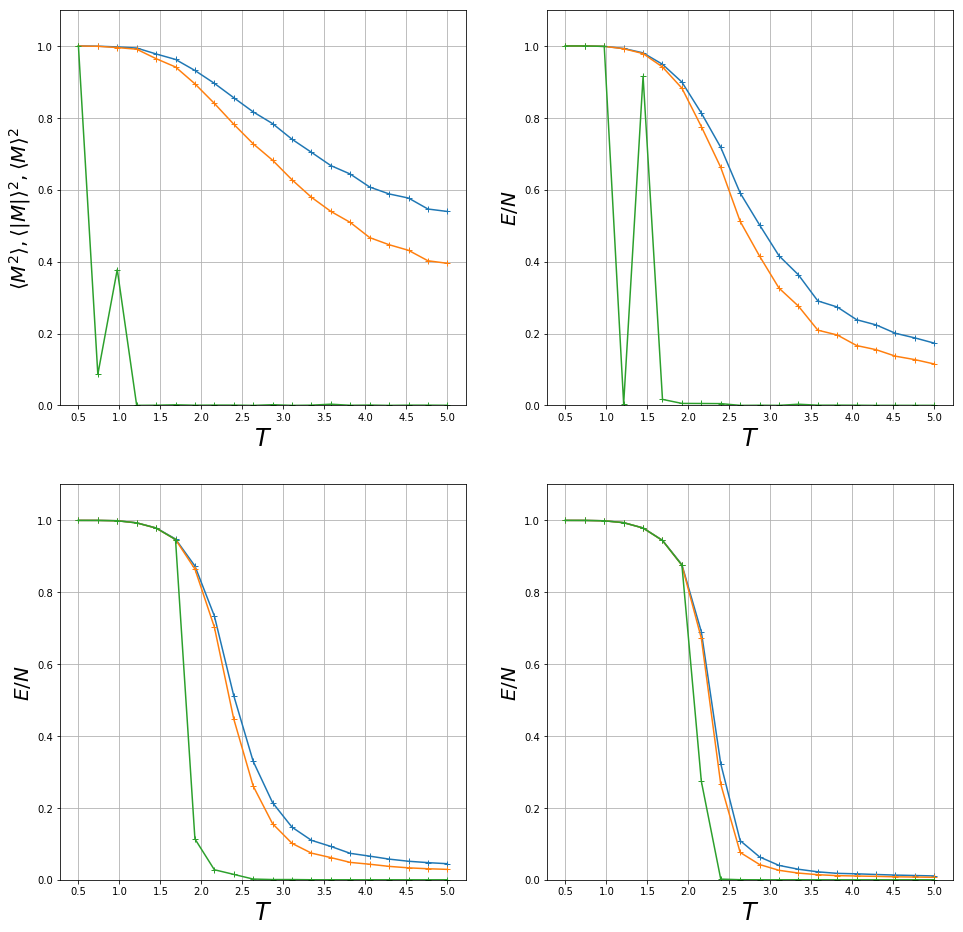

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(16,16))
T_ticks = np.linspace(0.5, 5, 10)

L=2
axes[0,0].plot(T_all, M_sqr_size[L]/L**4, '-+')
axes[0,0].plot(T_all, (M_abs_size[L])**2/L**4, '-+')
axes[0,0].plot(T_all, (M_size[L])**2/L**4, '-+')
axes[0,0].set_ylim([0,1.1])
axes[0,0].set_xticks(T_ticks)
axes[0,0].set_xlabel(r'$T$', fontsize=24)
axes[0,0].set_ylabel(r'$\langle M^2\rangle, \langle |M|\rangle^2, \langle M\rangle^2$', fontsize=20)
axes[0,0].grid(True)

L=4
axes[0,1].plot(T_all, M_sqr_size[L]/L**4, '-+')
axes[0,1].plot(T_all, (M_abs_size[L])**2/L**4, '-+')
axes[0,1].plot(T_all, (M_size[L])**2/L**4, '-+')
axes[0,1].set_ylim([0,1.1])
axes[0,1].set_xticks(T_ticks)
axes[0,1].set_xlabel(r'$T$', fontsize=24)
axes[0,1].set_ylabel(r'$E/N$', fontsize=20)
axes[0,1].grid(True)

L=8
axes[1,0].plot(T_all, M_sqr_size[L]/L**4, '-+')
axes[1,0].plot(T_all, (M_abs_size[L])**2/L**4, '-+')
axes[1,0].plot(T_all, (M_size[L])**2/L**4, '-+')
axes[1,0].set_ylim([0,1.1])
axes[1,0].set_xticks(T_ticks)
axes[1,0].set_xlabel(r'$T$', fontsize=24)
axes[1,0].set_ylabel(r'$E/N$', fontsize=20)
axes[1,0].grid(True)

L=16
axes[1,1].plot(T_all, M_sqr_size[L]/L**4, '-+')
axes[1,1].plot(T_all, (M_abs_size[L])**2/L**4, '-+')
axes[1,1].plot(T_all, (M_size[L])**2/L**4, '-+')
axes[1,1].set_ylim([0,1.1])
axes[1,1].set_xticks(T_ticks)
axes[1,1].set_xlabel(r'$T$', fontsize=24)
axes[1,1].set_ylabel(r'$E/N$', fontsize=20)
axes[1,1].grid(True)


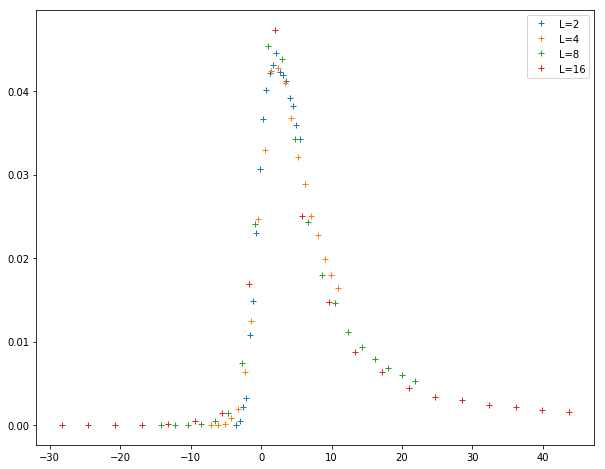

In [19]:
fig, ax = plt.subplots(figsize=(10, 8))

for L in [2,4,8,16]:
    ax.plot((T_all-Tc)*L, (chi_abs_size[L]*(L**(-7/4))/(L*L)), '+', label='L={}'.format(L))
ax.legend()

In [ ]:
np.savetxt('rawdata/E_vs_T_L04.txt', Z, delimiter=', ')
np.savetxt('rawdata/C_vs_T_L04.txt', C_size[4])
np.savetxt('rawdata/M_abs_vs_T_L04.txt', M_abs_size[4])
np.savetxt('rawdata/chi_abs_vs_T_L04.txt', chi_abs_size[4])
np.savetxt('rawdata/M_vs_T_L04.txt', M_size[4])
np.savetxt('rawdata/chi_vs_T_L04.txt', chi_size[4])
np.savetxt('rawdata/M_sqr_vs_T_L04.txt', M_sqr_size[4])